<img src="../files/misc/logo.png" width=300/>
<h1 style="color:#872325"> Webscrapping </h1>

De acuerdo a [Wikipedia](https://es.wikipedia.org/wiki/Web_scraping), *Web Scrapping*, 

> es una técnica utilizada mediante programas de software para extraer información de sitios web. Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

Para fines prácticos, realizamos un web scrapping cuándo no contamos con alguna manera de acceder a información estructurada de datos por analizar (.csv, .json, base de datos, API). 

---

## HTML
Al hacer webscrapping, dependemos de la estructura de la página web para poder acceder a la información que deseamos obtener. La estructura de la página web se define mediante un lenguaje llamado `HTML` (Hypertext Markup Language) el cual se compone por medio de *tags*.

```HTML
<tag>
</tag>
```

Un *tag* define una sección de la página. Cada *tag* tiene una propiedad. Un conjunto de estos tags definen el cuerpo de la página.


### Una primera página web
```HTML
<!DOCTYPE html>
<html>
<body>

<h1>Data Science and Machine Learning</h1>

</body>
</html>
```

Para nuestros fines, un *tag* representará una sección dentro de la página la cuál nos gustaría explorar o extraer.

---

## CSS

Un *Cascading Style Sheet* (CSS), es un archivo que viene acompañado de un html y define el estilo de la página.

```CSS
selector {
    property: property-value;
}
```

Cada *selector* contiene diferentes [propiedades](http://web.simmons.edu/~grabiner/comm244/weekthree/css-basic-properties.html) de acuerdo al *tag*, clase o *id* que le corresponda.

Para fines de webscrapping, un los *tags*, *ids* y *clases* ofrencen estrucura dentro de una página.

* Tags: estructura general
* Clase: secciones genéricas dentro de una página
* *id*: Secciones especifícas

---

## Javascript y el DOM

La mayoría de las páginas que visitamos hoy en día son interactivas. La interactividad de un una página web es proporcionada por un lenguaje de programación llamado `javascript`.

La manera en la que Javascript asigna u obtiene elementos de una página se conoce como el *Document Object Notation* (DOM).

Para fines de webscrapping, esto es importante puesto que en ocasiones, una página es vacía hasta que un programa de Javascript se ejecuta para arrojar información.

## Un primer webscrap

En este módulo estaremos ocupando la librería [requests_html](https://github.com/psf/requests-html) para hacer webscrapping.

In [ ]:
from requests_html import HTML    

In [ ]:
with open("../files/lec04/ex03.html") as f:
    webp = f.read()

html = HTML(html=webp)
print(html.html)

In [ ]:
# Extrayendo todos los links de la página
html.links

In [ ]:
# Extrayendo el primer encabezado de la página
html.find("H1", first=True).text

In [ ]:
# Buscando todos los elementos <p> (paragrapshs)
html.find("p")

In [ ]:
# Extrayendo una sección dentro de un div
html.find("div", first=True)

### Un segundo ejemplo

In [ ]:
with open("../files/lec04/ex04.html") as f:
    webp = f.read()

html = HTML(html=webp)
print(html.html)

In [ ]:
# ¿Qué notamos en este ejemplo que no concuerde
# con lo que esperaríamos ver en la página?
for item in html.find("p"):
    print(item.text)

In [ ]:
html.find("p[id='greeting']", first=True)

<h1 style="color:#872325">HTTP Requests</h1>

Las páginas que visitamos día a día viven en un servidor y no en nuestra computadora. Al abrir nuestro navegador y entrar a una página, el navegador solicita la información de la página al servidor por medio de un proceso de intercambio de información conocido como HTTP.

> *Hypertext Transfer Protocol* (HTTP) es un proceso mediante el cual se hace un intercambio de información entre un cliente (un navegador) y un servidor por medio de mensajes.

![server](https://mdn.mozillademos.org/files/13677/Fetching_a_page.png)
**Fuente**x: https://developer.mozilla.org

Dependiendo del tipo de mensaje que le mandemos a un servidor, este procesará la información enviada desde el cliente (nosotros) de diferentes maneras. Para fines de webscrapping, los métodos más comúnes de comunicarte con un servidor son:

* `GET`: Solicitia un archivo determinado al servidor. Un *GET Request* se debe usar exclusivamente para adquirir información.
    * Obtener información de una página web
    * Cargar una imágen

* `POST`: Envía datos al servidor para ser procesados
    * Dejar tu número celular en una página
    * Loggearte
    * Dejar un comentario en un blog post

En Python, podemos hacer conexiones a una página por medio de la librería `requests`

In [ ]:
import requests

In [ ]:
r = requests.get("https://nabla.mx")
r

Posteriormente tendríamos que pasarlo a una instancia de la clase `HTML` para poder analizar la página. Para evitar esto, podemos hacer uso de la clase `HTMLSession` que nos permite hacer llamadas al servidor y acceso al html que nos regrese.

In [ ]:
from requests_html import HTMLSession

In [ ]:
with HTMLSession() as sess:
    r = sess.get("https://nabla.mx")
r

In [ ]:
r.html.links

<h1 style="color:#872325">Webscrapping</h1>

<h2 style="color:teal">Ejemplo: Arxiv ML Papers (I)</h2>

Consigue el nombre y el link de los último 25 papers en Machine Learning publicados en Arxiv y guárdalos dentro de un archivo `csv`.

In [ ]:
from requests_html import HTMLSession
import pandas as pd

In [ ]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

In [ ]:
divpage = r.html.find("div[id='dlpage']", first=True)

In [ ]:
divpage.find("h1", first=True).text

In [ ]:
papers_links = divpage.find("dt")
len(papers_links)

In [ ]:
papers_titles = divpage.find("dd")
len(papers_titles)

In [ ]:
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    values.append([title, abstract_url])

In [ ]:
df_values = pd.DataFrame(values, columns=["title", "url"])
df_values.head()

In [ ]:
# Depuramos la información que no necesitamos
df_values = df_values.assign(title=df_values.title.str.lstrip("Title: "))
df_values.head()

In [ ]:
# df_values.to_csv("ML-arxiv.csv", index=False)

## Queries al sistema

En ocasiones un *GET method* puede venir acompañado con parámetros obligatorios u opcionales para el sistema.

* Se denota una sección de parámetros de consulta por medio de `?`.
* cada par parametro-valor se denota `param=val`
* se separa cada query por medio de `&`

```
http://some-page.com?key1=val1&key2=val2&..&keyn=valn
```

In [ ]:
url = "https://arxiv.org/list/stat.ML/recent?show=250"
with HTMLSession() as sess:
    r = sess.get(url)
r

In [ ]:
papers_titles = r.html.find("div[id='dlpage']", first=True).find("dd")
len(papers_titles)

### Una manera más limpia de mandar queries

In [ ]:
url = "https://arxiv.org/list/stat.ML/recent"
data = {
    "show": 250
}
with HTMLSession() as sess:
    r = sess.get(url, params=data)
r

In [ ]:
papers_titles = r.html.find("div[id='dlpage']", first=True).find("dd")
len(papers_titles)

<h1 style="color:#872325">APIs</h1>

En ocasiones no es necesario acceder a un HTML a fin de obtener la información deseada de una página web. 

Un API (*Application programming interface*),
> es un protocolo de comunicación entre un cliente y un servidor diseñado para simplificar la creación aplicaciónes por parte del cliente. [...] Un API está diseñado de tal manera que si el cliente hace una petición al sistema en un formato específico, siempre tendrá el mismo formato de respuesta por parte del servidor, o iniciará una acción definida.

En esta sección ocuparemos el API de [Alpha Vantage](https://www.alphavantage.co), un proveedor de información histórica y tiempo real de datos de acciones, FX y criptomonedas.

<h2 style="color:teal">Ejemplo: Alpha Vantage</h2>

A fin de hacer mejor uso de un API es importante siempre revisar la documentación del API.

In [ ]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format = "retina"

In [ ]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage (es personal)
avkey = os.environ["ALPHA_VANTAGE_KEY"]

In [ ]:
curr_list_url = "https://www.alphavantage.co/physical_currency_list/"
curr_list = pd.read_csv(curr_list_url).set_index("currency name")
curr_list.head()

In [ ]:
from_curr = "United States Dollar"
curr_list.filter([from_curr], axis=0)

In [ ]:
currencies = ["Mexican Peso", "Euro", "Brazilian Real", "Argentine Peso"]
target_curr = curr_list.filter(currencies, axis=0)
target_curr

## Mensajes de Error

Entramos a la páginas de AlphaVantage y revisamos la documentación para descargar información

In [ ]:
intraday1 = {
    "function": "FX_INTRADAY",
    "to_currency": target_curr["currency code"].values[0],
    "from_currency": "USD",
    "apikey": avkey
}

r = requests.get(base_url, params=intraday1)
r

In [ ]:
r.json()

In [ ]:
intraday2 = {
    "function": "FX_INTRADAY",
    "to_symbol": target_curr["currency code"].values[0],
    "from_symbol": "USD",
    "apikey": avkey,
    "interval": "1min"
}

r = requests.get(base_url, params=intraday2)
r

## Manipulando Información de Respuesta

Una vez obtenida la información del API, el siguiente paso es manipular la información para poder analizarla. De ser una seríe de tiempo, lo más natural sería manipularla usando un pandas DataFrame.

In [ ]:
data = r.json()
data.keys()

In [ ]:
data["Meta Data"]

In [ ]:
df_data = pd.DataFrame(data["Time Series FX (1min)"]).T
df_data.head()

In [ ]:
df_data.dtypes

## FX Daily

In [ ]:
intraday1 = {
    "function": "FX_DAILY",
    "to_symbol": target_curr["currency code"].values[0],
    "from_symbol": "USD",
    "apikey": avkey,
    "outputsize": "full",
}

r = requests.get(base_url, params=intraday1)
r

In [ ]:
data = r.json()

In [ ]:
df_data = pd.DataFrame(data["Time Series FX (Daily)"], dtype=float).T.sort_index()

In [ ]:
(df_data.apply(lambda x: x["4. close"] - x["1. open"], axis=1)
        .plot(figsize=(12, 4), linewidth=1))
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

<h1 style="color:#872325">API Wrappers (Liberías)</h1>

Como hemos visto, utilizar un API require la codificación de los parámetros que espera recibir el servidor, hacer la llamada al servidor para validar la respuesta y manipular la información recibida a fin de hacer uso de esta.

De querer obtener el mismo formato de respuesta sería necesario crear una librería en Python que contemple cada uno de estos pasos, lo cuál se podría volver una tarea tediosa.

Un **API Wrapper** es una librería escrita en un lenguaje de programación que nos da acceso a un API usando un lenguaje de programación específico

**Nota**: Una de las desventajas de usar un API Wrapper son los posibles *bugs* que el wrapper podría tener.

https://github.com/RomelTorres/alpha_vantage

```
pip install alpha_vantage
```

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
fx = ForeignExchange(key=avkey, output_format="pandas")
data, metadata = fx.get_currency_exchange_daily("USD", "MXN")
data["4. close"].plot()

<h2 style="color:crimson">Ejercicios</h2>

1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

----

2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>


----
3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)

---

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

---

5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)

---

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

## Ejercicios

### Ejercicio 1

Repite el ejemplo Arxiv ML Papers (I), agrega dos nuevas columnas al DataFrame final: Abstract, con el resumen de cada paper; Submitted, con la fecha en la que fue agregado al sistema. Hint: Ambos elementos se encuentran dentro de la url encontrada.

In [1]:
#Importar las librerias a utilizar
from requests_html import HTMLSession
import pandas as pd
import re

In [2]:
def extract_abstract(sess, url):
    """
    Extrae todos el abstract y la fecha de cada paper`
    """
    r = sess.get(url)
    abstract = r.html.find("blockquote[class='abstract mathjax']", first=True).text
    dates = r.html.find("div[class='dateline']", first=True).text

    dates, *_ = re.findall("(?<= on ).*(?=\))"  ,dates)
    abstract, *_ = re.findall("(?<=Abstract\: ).*"  , abstract)
    
    return abstract, dates

In [3]:
#Requests a la página de interes
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [4]:
#Se accede a la división de intéres
divpage = r.html.find("div[id='dlpage']", first=True)
papers_links = divpage.find("dt")
papers_titles = divpage.find("dd")

In [5]:
#Se extraen los valores de intéres
values = []

with HTMLSession() as sess:
    for link_secc, title_secc in zip(papers_links, papers_titles):
        title = title_secc.find("div[class='list-title mathjax']", first=True).text

        abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
        abstract_url, *_ = abstract_url

        abstract, dates = extract_abstract(sess, abstract_url)

        values.append([title, abstract_url, abstract, dates])

In [6]:
#Se obtiene el dataframe deseado
df_values = pd.DataFrame(values, columns=["title", "url" , "abstract", "submitted"])
df_values.head()

,title,url,abstract,submitted
0,Title: Self-Tuning Deep Reinforcement Learning,https://arxiv.org/abs/2002.12928,Reinforcement learning (RL) algorithms often r...,28 Feb 2020
1,Title: The estimation error of general first o...,https://arxiv.org/abs/2002.12903,Modern large-scale statistical models require ...,28 Feb 2020
2,Title: Generalizing Convolutional Neural Netwo...,https://arxiv.org/abs/2002.12880,The translation equivariance of convolutional ...,25 Feb 2020
3,Title: A Deep Generative Model for Fragment-Ba...,https://arxiv.org/abs/2002.12826,Molecule generation is a challenging open prob...,28 Feb 2020
4,Title: Risk Bounds for Multi-layer Perceptrons...,https://arxiv.org/abs/2002.12640,We characterize the behavior of integral opera...,28 Feb 2020


## Ejercicio 2

2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>



In [7]:
#Se importan las librerias de interes
import requests
import os
from collections import defaultdict
from alpha_vantage.foreignexchange import ForeignExchange

In [8]:
#Se definen las varibles para trabajar
os.environ["ALPHA_VANTAGE_KEY"] = "GGNNS3SVY76A7NUV"
avkey = os.environ["ALPHA_VANTAGE_KEY"]
base_url = "https://www.alphavantage.co/query"


In [9]:
def extract_div(avkey, moneda, base_url):
    """
        Se define una funcion que extrae la  información de precios historicos de una divisa en particular
    
    """
    daily = {
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol": moneda,
        "apikey": avkey,
        "outputsize": "full",
        }
    r = requests.get(base_url, params=daily) 
    data = r.json()
    
    precios = defaultdict(dict)
    for key, values in data['Time Series FX (Daily)'].items():
        precios[key] = values['4. close']
    return precios

In [10]:
#Se ejecuta el proceso de extracción de información de divisas
monedas = ["MXN", "EUR", "BRL", "ARS", "CHF"]
monedas_precios = defaultdict(dict)
for moneda in monedas:
    data = extract_div(avkey, moneda, base_url)
    monedas_precios[moneda] = data

In [11]:
#Se crea el dataframe deseada
df_data = pd.DataFrame(monedas_precios, dtype=float).dropna().sort_index()

In [12]:
df_data.head()

,MXN,EUR,BRL,ARS,CHF
2014-11-07,0.0737,1.2454,0.3902,0.117,1.0341
2014-11-09,0.0738,1.2462,0.3894,0.117,1.0359
2014-11-10,0.0734,1.2424,0.3933,0.117,1.0328
2014-11-11,0.0735,1.2473,0.3894,0.117,1.0364
2014-11-12,0.0737,1.2428,0.3890,0.117,1.0337


## Ejercicio 3

In [13]:
import seaborn as sns

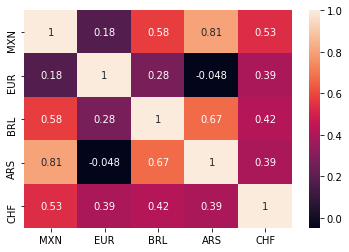

In [14]:
#Se crea el gráfico de intéres
headmap_sns = sns.heatmap(df_data.corr(), annot=True)

## Ejercicio 4

In [15]:
# Se crea la correlación con ventana movil de 30 días
aux = df_data.rolling(30).corr().dropna()

In [16]:
aux.head()

MXN       EUR       BRL       ARS       CHF
2014-12-10 MXN  1.000000  0.687213  0.325804  0.974887  0.685253
           EUR  0.687213  1.000000  0.015035  0.619399  0.995422
           BRL  0.325804  0.015035  1.000000  0.283967 -0.010822
           ARS  0.974887  0.619399  0.283967  1.000000  0.619416
           CHF  0.685253  0.995422 -0.010822  0.619416  1.000000

In [17]:
#Se extrae la información de la correlación con la divida MXN
dataset_2 = aux.xs("MXN", level = 1)[["EUR","BRL","ARS","CHF"]]

In [18]:
dataset_2.loc["2015-03-19":]

,EUR,BRL,ARS,CHF
2015-03-19,0.900941,0.870440,0.835029,0.916637
2015-03-20,0.874866,0.815453,0.762308,0.903594
2015-03-22,0.866783,0.789977,0.726098,0.900547
2015-03-23,0.835823,0.728781,0.643129,0.885424
2015-03-24,0.801267,0.671188,0.560149,0.877682
...,...,...,...,...
2020-02-26,-0.132666,0.332192,0.146621,-0.273137
2020-02-27,-0.196531,0.504148,0.304529,-0.355744
2020-02-28,-0.268271,0.627480,0.426425,-0.451384
2020-03-01,-0.340049,0.718202,0.533992,-0.538785


## Ejercicio 5

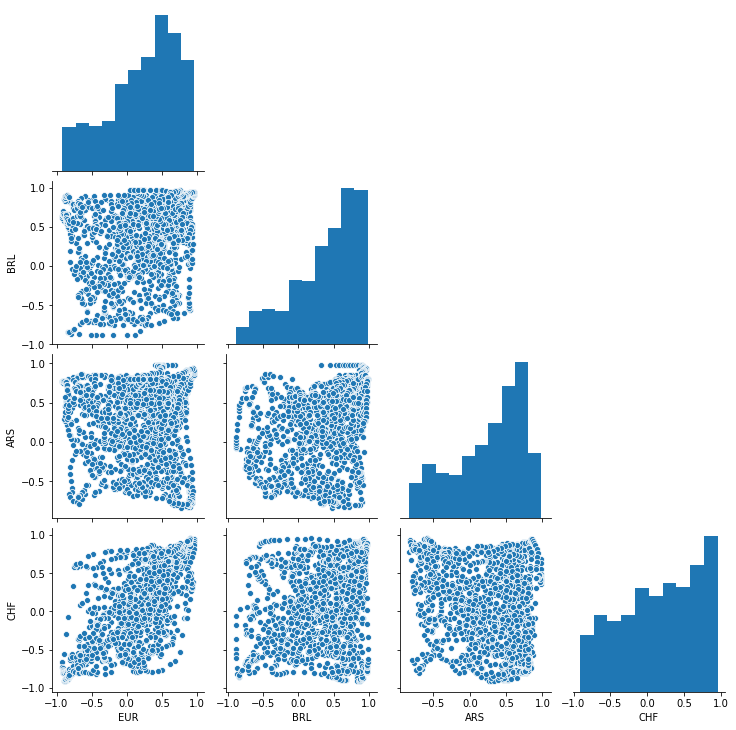

In [19]:
sns.pairplot(dataset_2, vars = ["EUR","BRL","ARS","CHF"], corner = True) 

Aunque la gráfica anterior presenta mayor cantidad de observaciones que la gráfica a la que se tenia que llegar. Los comportamientos se mantienen. Vemos por ejemplo que la divida EUR presenta una correlación líneal versus div CHF con respecto a MXN. Es decir, ambos divisas se relacionan en el mismo sentido y magnitud respecto a la divisa Mexicana. Otras correlaciones si representan algún patron aunque no necesariamente lineal, por lo que si podría existir una codependencia entre las variables

## Ejercicio 6

In [20]:
#Se crea el dataset deseado
dataset_2['max_corr'] =dataset_2[['EUR', 'BRL', 'ARS', 'CHF']].max(axis = 1) 
dataset_2['min_corr'] =dataset_2[['EUR', 'BRL', 'ARS', 'CHF']].min(axis = 1) 
dataset_2['avg_corr'] =dataset_2[['EUR', 'BRL', 'ARS', 'CHF']].mean(axis = 1) 

In [21]:
dataset_plot = dataset_2[["max_corr","avg_corr","min_corr"]]

In [22]:
dataset_plot.head()

,max_corr,avg_corr,min_corr
2014-12-10,0.974887,0.668289,0.325804
2014-12-11,0.975359,0.675065,0.444098
2014-12-12,0.976607,0.655898,0.531188
2014-12-14,0.979615,0.637848,0.485051
2014-12-15,0.981691,0.631396,0.444021


In [23]:
import matplotlib.pyplot as plt

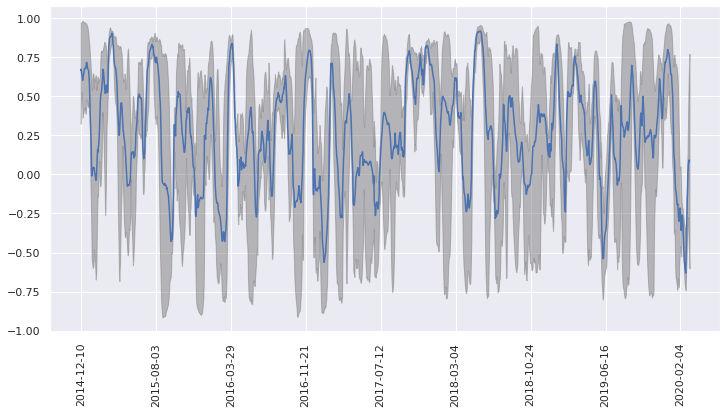

In [24]:
#Se plotea el grafico de intéres
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis = "x",labelrotation=90)
ax.plot(dataset_plot['avg_corr'])
ax.fill_between(dataset_plot.index ,dataset_plot['min_corr'] , dataset_plot['max_corr'], color = "grey", alpha = 0.5)


## References


* https://developer.mozilla.org/en-US/docs/Web
* https://www.w3schools.com/tags/ref_httpmethods.asp